# Week 14

In [2]:
packages<- c(
"dplyr",
"readr",
"tidyr",
"purrr",
"broom",
"magrittr",
"corrplot",
"caret",
"rpart",
"rpart.plot",
"e1071",
"torch",
"luz",
"ramify",
"keras"
)
sapply(packages, require, character.only=T)

Loading required package: dplyr




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: readr

Loading required package: tidyr

Loading required package: purrr

Loading required package: broom

Loading required package: magrittr


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: rpart

Loading required package: rpart.plot

Loading required package: e1071

Loading required package: torch

Loading required package: luz

Loading required package: ramify

Wa

dplyr      readr      tidyr      purrr      broom   magrittr   corrplot 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
     caret      rpart rpart.plot      e1071      torch        luz     ramify 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE      FALSE 
     keras 
     FALSE

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.2.1     v forcats 0.5.2
v stringr 1.4.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x magrittr::extract()   masks tidyr::extract()
x dplyr::filter()       masks stats::filter()
x dplyr::lag()          masks stats::lag()
x caret::lift()         masks purrr::lift()
x magrittr::set_names() masks purrr::set_names()


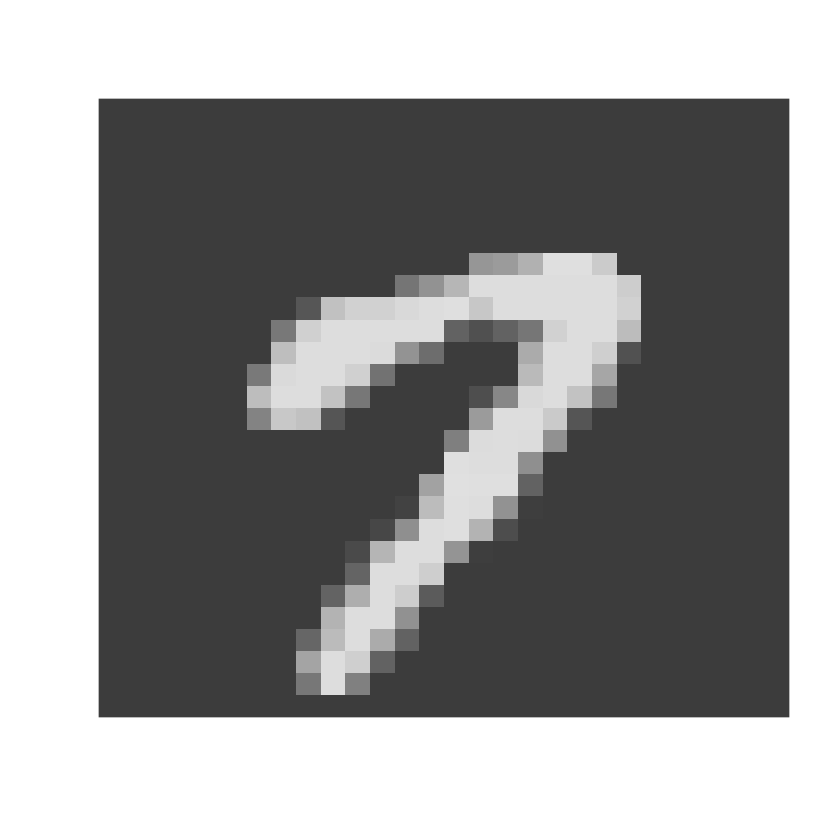

In [3]:
library(tidyverse)
data = read.csv("image_data.csv",header = F)
change = lapply(asplit(data, 1), matrix, nrow= 28)
image(change[[1]][,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )

# 1.1

### 1

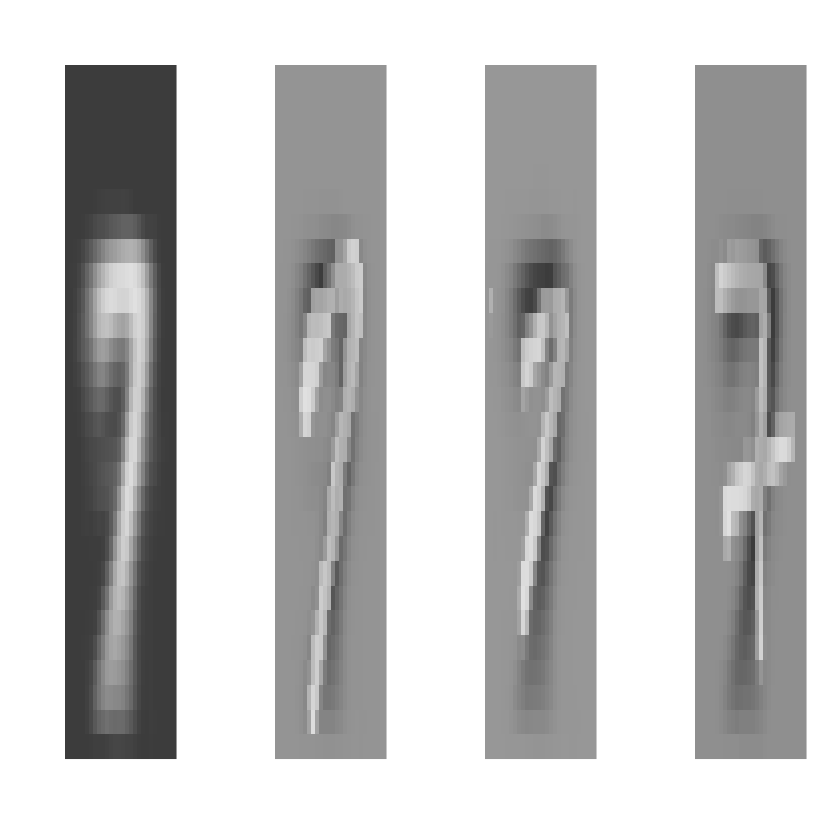

In [4]:
par(mfrow=c(1,4))
# mean784 = colMeans(data) %>% matrix(nrow=28)
# image(mean784[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
mean784 = colMeans(data) 
image((mean784%>% matrix(nrow=28))[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )

for (i in 1:3){
  changei = change[[i]] - mean784
  image(changei[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
  
}

### 2

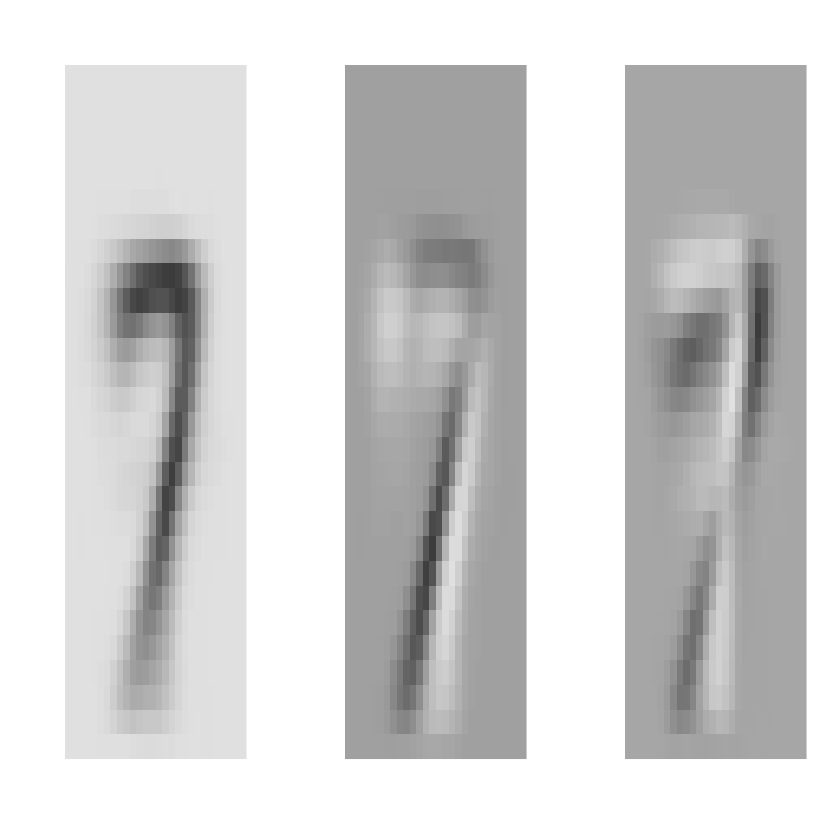

In [5]:
xtx = crossprod(as.matrix(data)) * 1/784
ev = eigen(xtx)
par(mfrow=c(1,3))
for (i in 1:3){
  evi = ev$vectors[, i] %>% matrix(nrow=28)
  image(evi[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000)  )
}

### 3

In [6]:
pca = prcomp(data)
evector25 = pca$rotation[,1:25]
dat1 = crossprod(as.matrix(data[1,]) %>% t, evector25)
dat1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
1,-2.371328,4.630464,4.300195,0.1366168,4.267409,-2.597558,0.3588868,-1.402071,1.199345,-0.4513706,...,-0.175562,0.8828348,-0.3998254,0.2288568,-0.3852087,0.5441369,-0.2404807,0.5112833,-0.332762,0.9666731


### 4

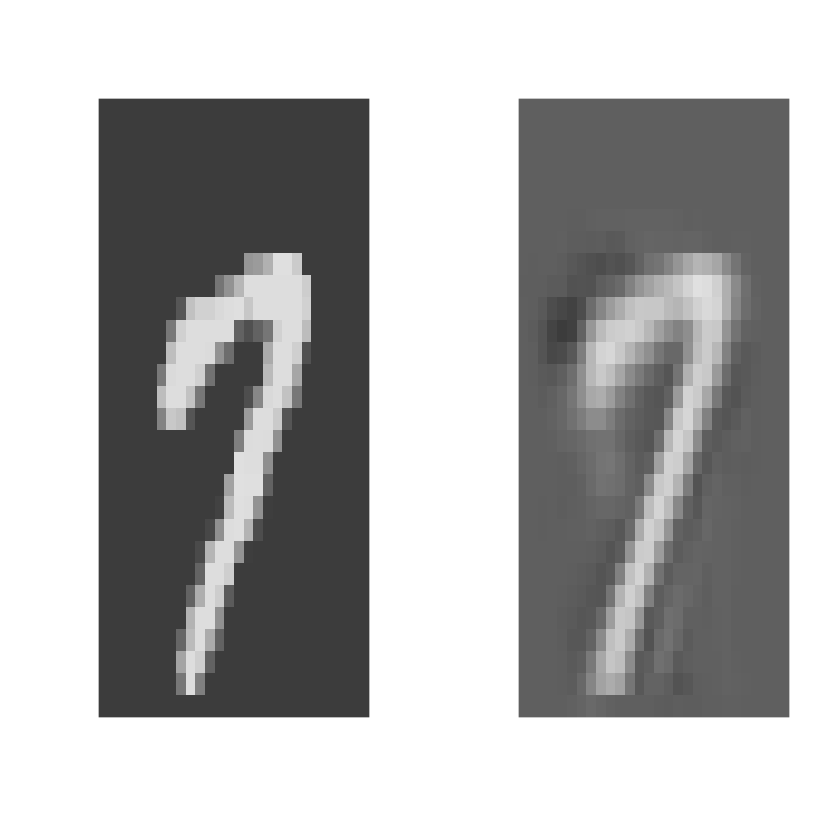

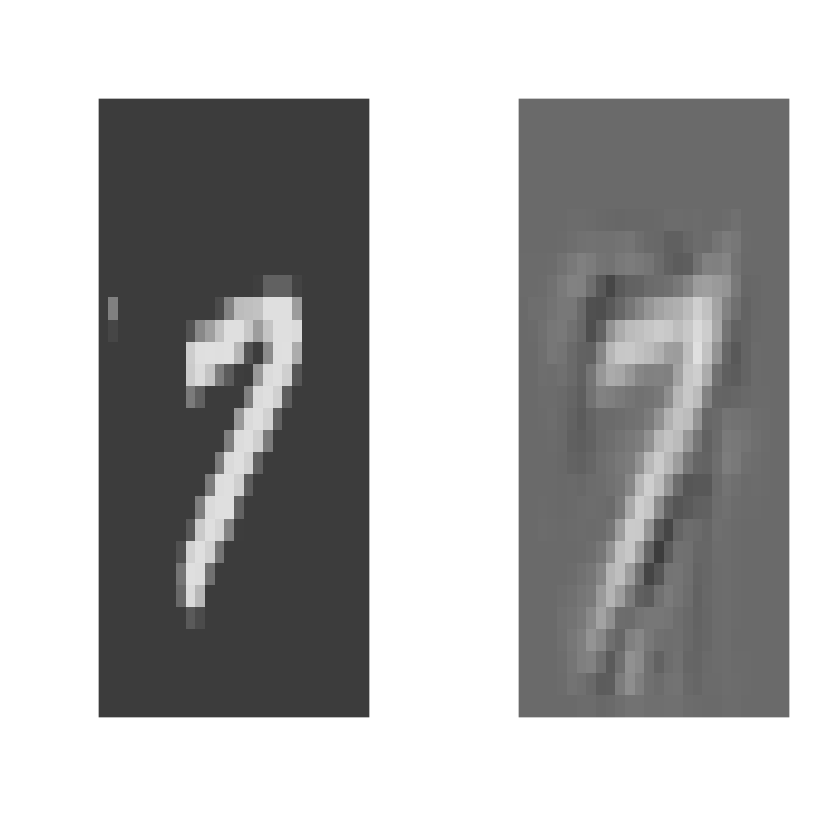

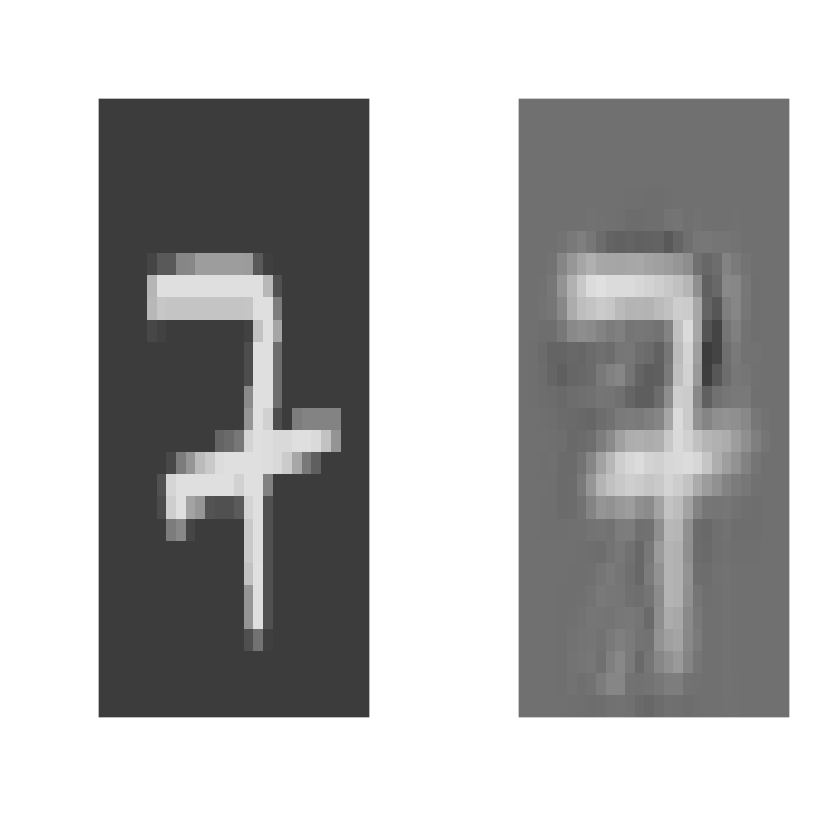

In [7]:
score = pca$x
zjuj = crossprod(evector25 %>% t, score[, 1:25] %>% t) 
reconstruct = apply(zjuj,2,\(x) x+mean784) %>%  t
#zjuj[,1] + mean784 == reconstruct[,1]
for (i in 1:3){
  par(mfrow=c(1,2))
  image(change[[i]][,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
  image((reconstruct[i,]%>% matrix(nrow=28))[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
}

### 1.2

When performing principal component analysis using $XX^T$ (covariance
matrix approach), the principal components capture the variability
within the observations (rows of the data matrix). Therefore, the
reconstruction obtained from the principal components represents the
original data in the observation space.

On the other hand, when using $X^TX$ (cross-product matrix approach),
the principal components capture the variability within the variables
(columns of the data matrix). Therefore, the reconstruction obtained
from the principal components represents the original data in the
variable space.

In practice, the reconstructions may differ in terms of their
interpretability and applicability to the problem at hand. The
reconstruction obtained from $XX^T$ may be more relevant if the goal is
to understand patterns and relationships among the observations, whereas
the reconstruction obtained from $X^TX$ may be more relevant if the
focus is on understanding the importance of variables or features in
explaining the variability of the data.

It’s important to note that both approaches aim to capture the maximum
amount of variance in the data, but they do so from different
perspectives (observations vs. variables), which can lead to different
reconstructions. The choice between the two approaches depends on the
specific characteristics of the data and the goals of the analysis.

In this case $XX^T$ will be more efficient since it is a 400x400 matrix,
smaller than the $X^TX$ (784x784).

### 1.2.2

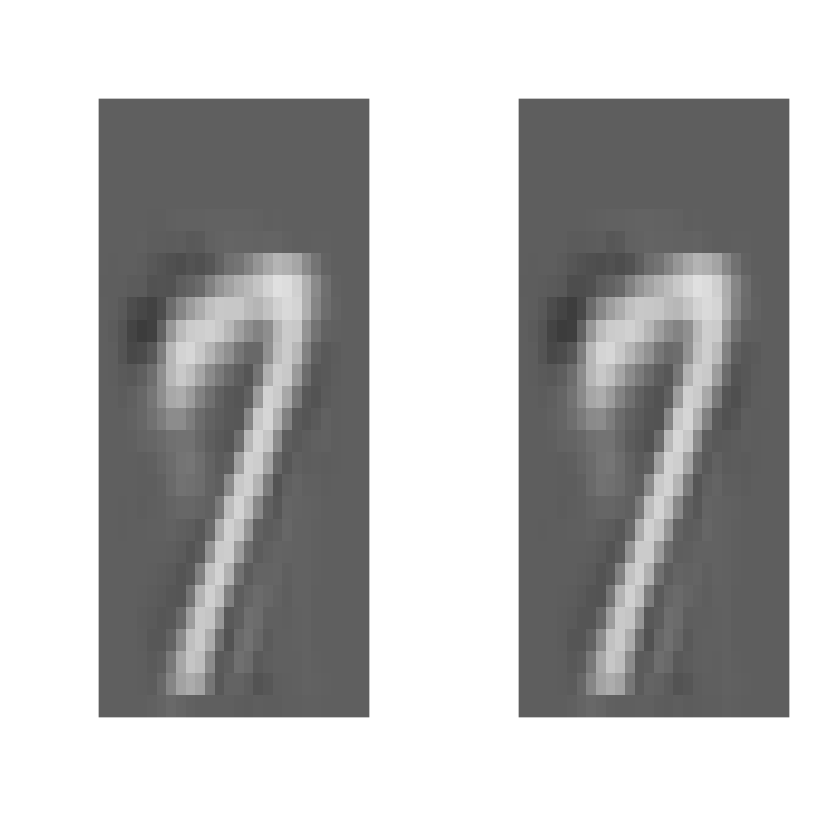

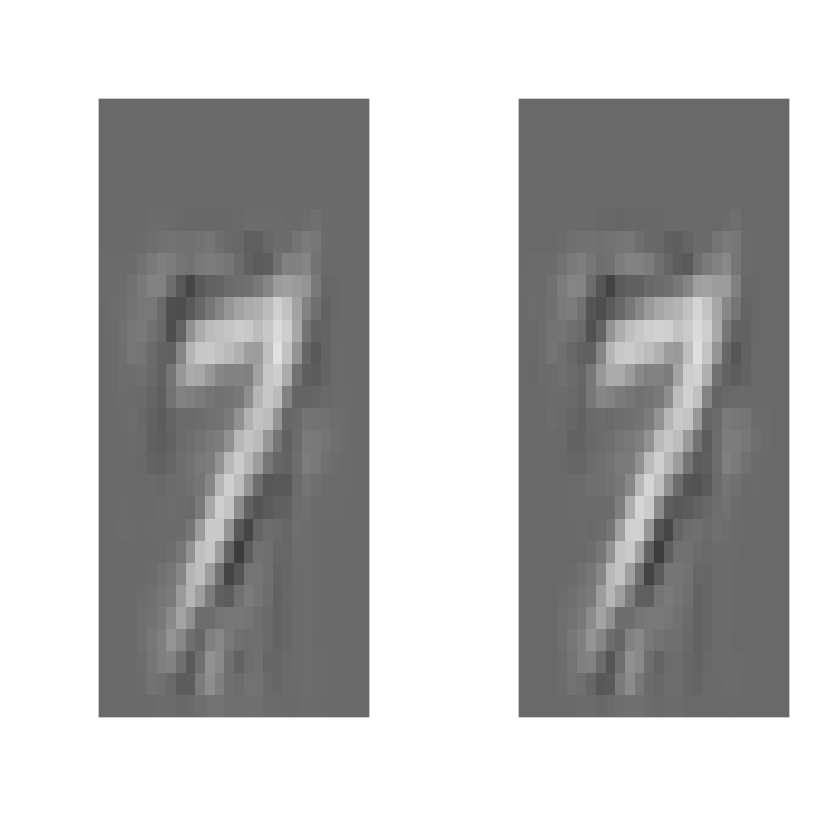

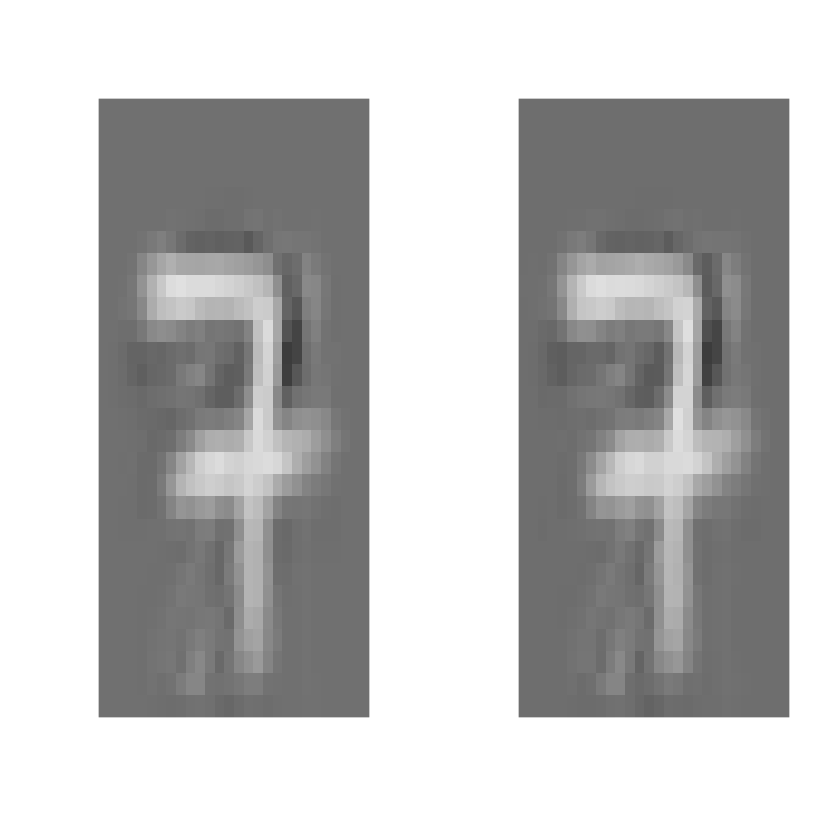

In [8]:
xxt = as.matrix(data) %*% t(data)
mean784.2 = colMeans(t(data))

pca2 = prcomp(t(data))
evector25.2 = pca2$rotation[,1:25]

###
score2 = pca2$x
zjuj2 = crossprod(evector25.2 %>% t, score2[, 1:25] %>% t) 
reconstruct2 = apply(zjuj2,2,\(x) x+ mean784.2)
#zjuj[,1] + mean784 == reconstruct[,1]
for (i in 1:3){
  par(mfrow=c(1,2))
  image((reconstruct[i,]%>% matrix(nrow=28))[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
  image((reconstruct2[i,]%>% matrix(nrow=28))[,28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000) )
}

### 1.2.4

I would say the two reconstructions are similar. This is a small
dataset. This is a dataset for hand written 7, so there is not a lot of
varaiblity among features(pixes) and data themselves.

# 2

Epoch 1/10
Train metrics: Loss: 0.115
Epoch 2/10
Train metrics: Loss: 0.0997
Epoch 3/10
Train metrics: Loss: 0.0804
Epoch 4/10
Train metrics: Loss: 0.0612
Epoch 5/10
Train metrics: Loss: 0.0497
Epoch 6/10
Train metrics: Loss: 0.0449
Epoch 7/10
Train metrics: Loss: 0.0419
Epoch 8/10
Train metrics: Loss: 0.0405
Epoch 9/10
Train metrics: Loss: 0.0384
Epoch 10/10
Train metrics: Loss: 0.0367


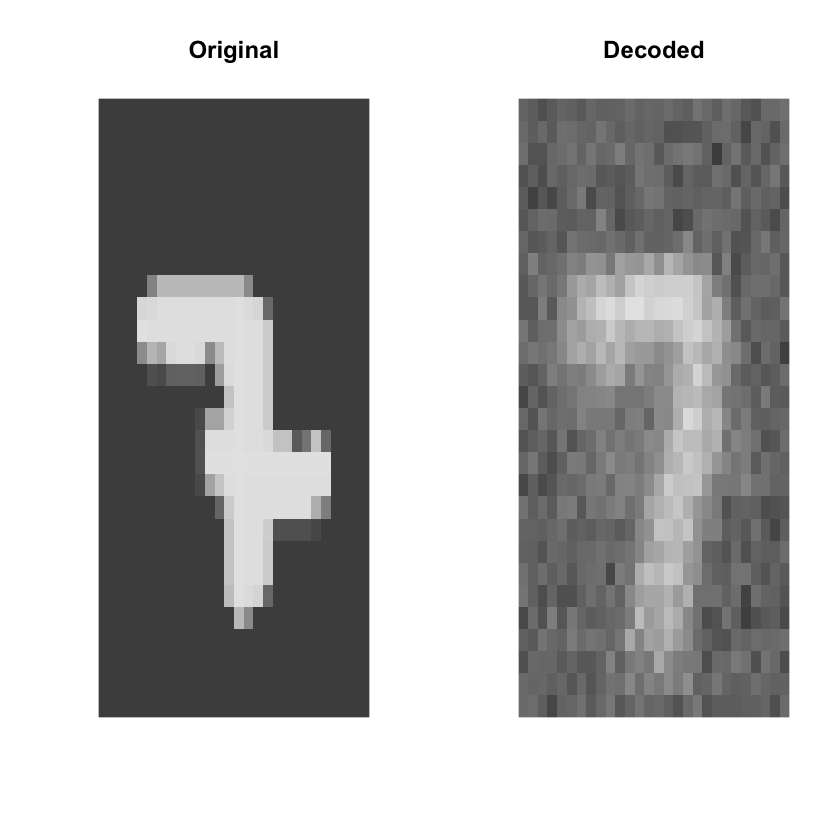

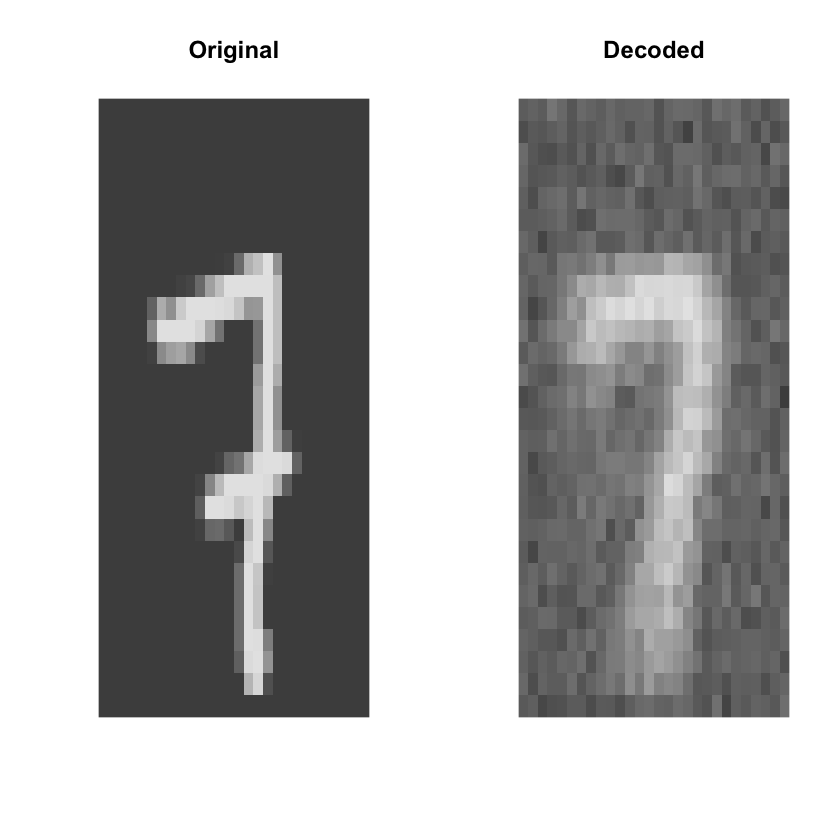

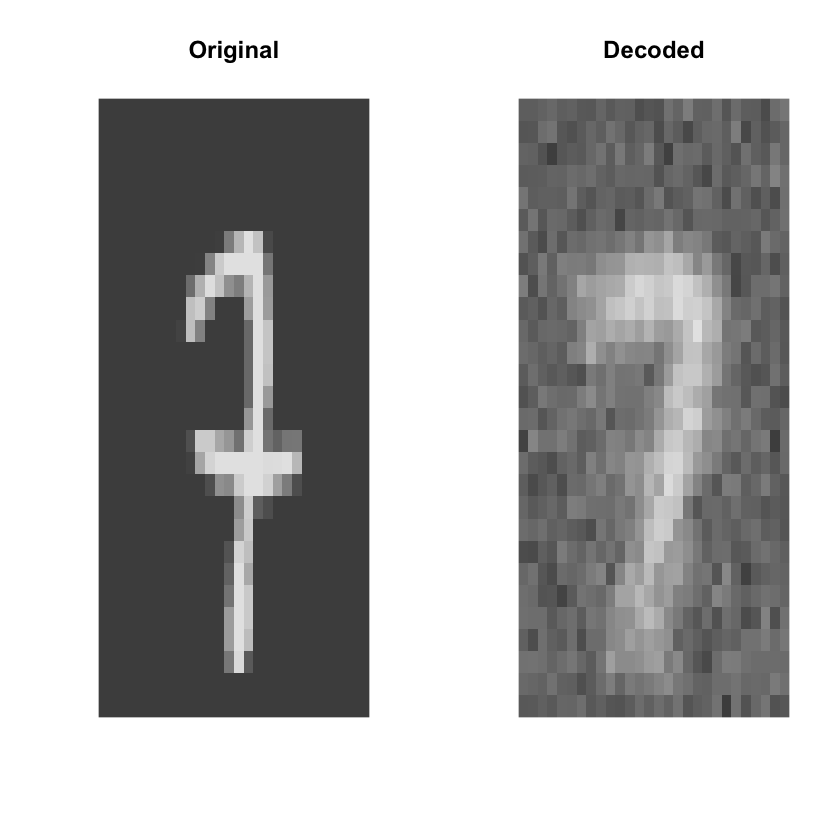

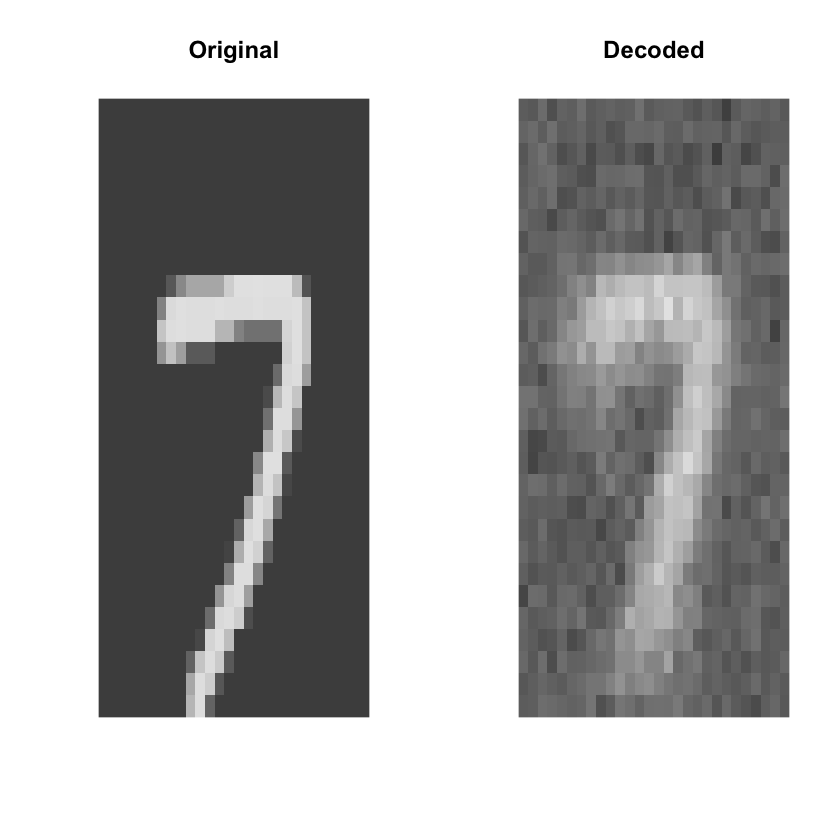

In [9]:
library(torch)
library(luz)
library(abind)
library(tidyverse)
data = read.csv("image_data.csv",header = F) %>% data.frame
a = unlist(data)
dim(a) = c(400, 28, 28)
inputs = torch_tensor(a)

autoencoder <- nn_module(
  initialize = function(p, o) {
    self$encoder <- nn_sequential(
      nn_linear(p, o)
    )
    self$decoder <- nn_sequential(
      nn_linear(o, p)
    )
  },
  forward = function(x) {
    x %>%
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder() %>%
      self$decoder() %>% 
      torch_reshape(c(-1, 28, 28))
  },
  predict = function(x) {
    x %>% 
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder()     
  }
)

ae_fit <- autoencoder %>%
  setup(
    loss = nn_mse_loss(),
    optimizer = optim_adam
  ) %>%
  set_hparams(
    p=28*28, o=25
  ) %>%
  set_opt_hparams(
    lr=1e-3
  ) %>%
  fit(
    data = list(
      inputs, 
      inputs # targets are the same as inputs
    ),
    epochs=10,
    verbose=TRUE
    )
plot_image = \(x) image(t(x)[1:28, 28:1], useRaster=TRUE, axes=FALSE, col=gray.colors(1000))
#plot_image(inputs[1] %>% as_array)
set.seed(100)
par(mfrow=c(4, 2))
for(k in 1:4){
  i <- sample(1:400, 1)
  input <- inputs[i]
  output <- ae_fit$model$forward(inputs[i:i])[1]
  par(mfrow=c(1, 2))
  plot_image(inputs[i] %>% as_array %>% t)
  title("Original")
  
  plot_image(output %>% as_array %>% t)
  title("Decoded")
}

Linear encoder decoder did a worse job than pca.

### 2.2 Nonlinear Autoencoder

Epoch 1/10
Train metrics: Loss: 0.0983
Epoch 2/10
Train metrics: Loss: 0.0717
Epoch 3/10
Train metrics: Loss: 0.0517
Epoch 4/10
Train metrics: Loss: 0.0453
Epoch 5/10
Train metrics: Loss: 0.0425
Epoch 6/10
Train metrics: Loss: 0.0397
Epoch 7/10
Train metrics: Loss: 0.0363
Epoch 8/10
Train metrics: Loss: 0.0331
Epoch 9/10
Train metrics: Loss: 0.0309
Epoch 10/10
Train metrics: Loss: 0.0293


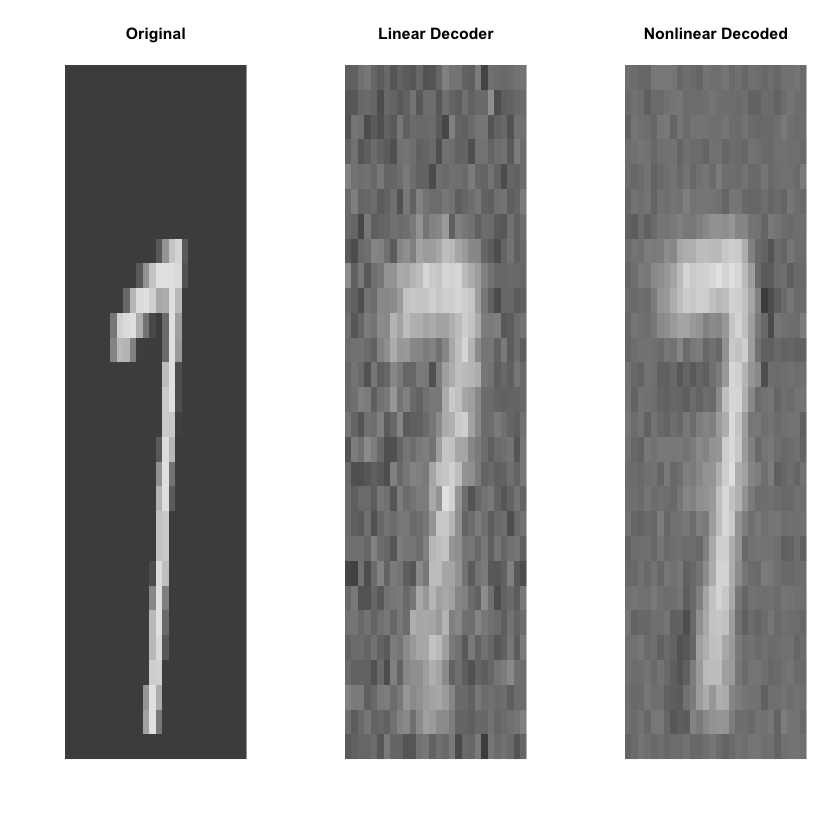

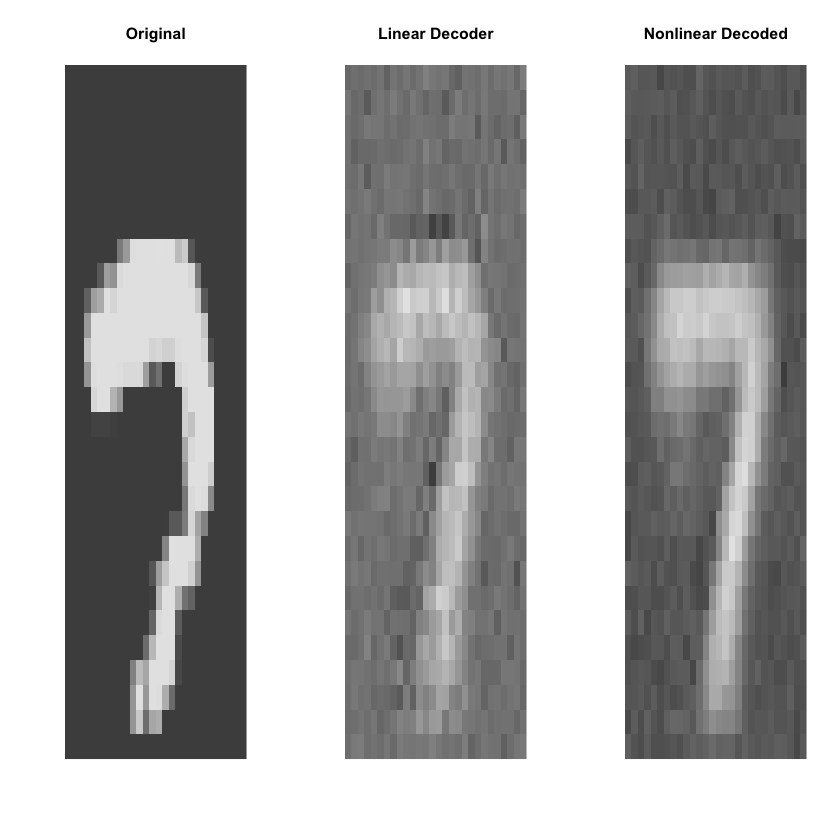

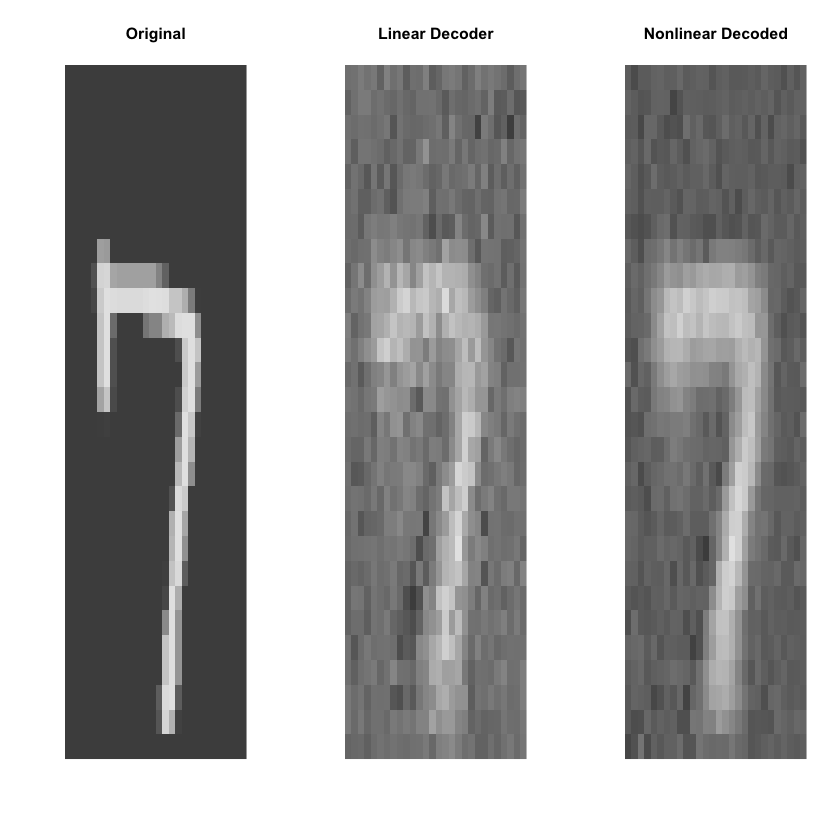

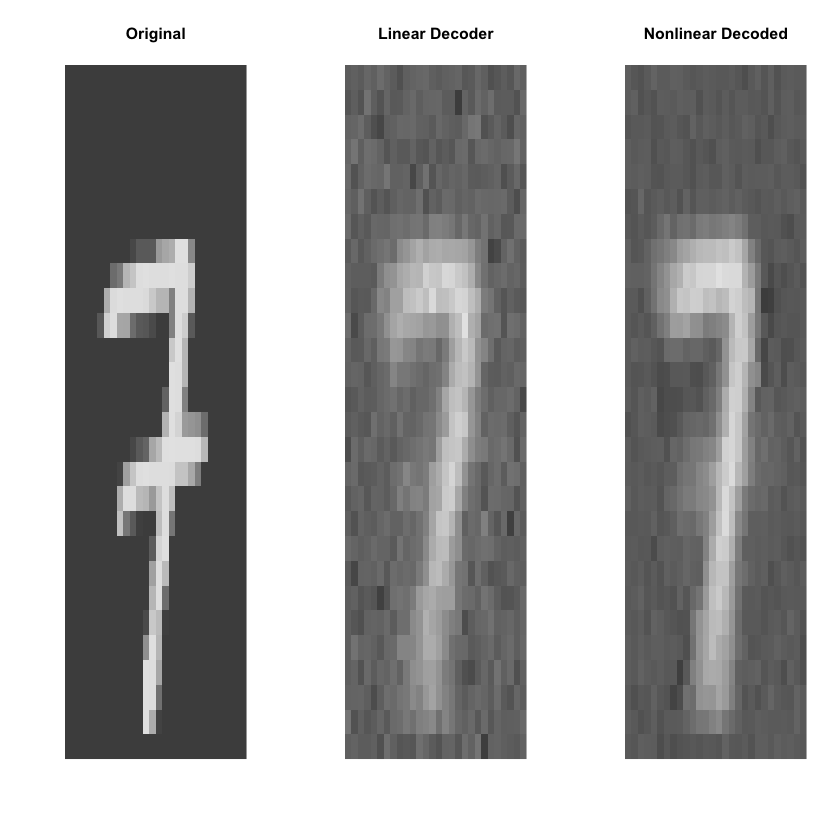

In [10]:
autoencoder2 <- nn_module(
  initialize = function(p, q1, o) {
    self$encoder <- nn_sequential(
      nn_linear(p, q1), nn_relu(),
      nn_linear(q1, o)
    )
    self$decoder <- nn_sequential(
      nn_linear(o, q1), nn_relu(),
      nn_linear(q1, p)
    )
  },
  forward = function(x) {
    x %>%
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder() %>%
      self$decoder() %>% 
      torch_reshape(c(-1, 28, 28))
  },
  predict = function(x) {
    x %>% 
      torch_reshape(c(-1, 28 * 28)) %>% 
      self$encoder()     
  }
)

ae_fit2 <- autoencoder2 %>%
  setup(
    loss = nn_mse_loss(),
    optimizer = optim_adam
  ) %>%
  set_hparams(
    p=28*28, q1 = 64, o=25
  ) %>%
  set_opt_hparams(
    lr=1e-3
  ) %>%
  fit(
    data = list(
      inputs, 
      inputs # targets are the same as inputs
    ),
    epochs=10,
    verbose=TRUE
  )

par(mfrow=c(4, 2))
for(k in 1:4){
  i <- sample(1:400, 1)
  input <- inputs[i]
  output1 <- ae_fit$model$forward(inputs[i:i])[1]

  output2 <- ae_fit2$model$forward(inputs[i:i])[1]
  par(mfrow=c(1, 3))
  plot_image(inputs[i] %>% as_array %>% t)
  title("Original")
  
  plot_image(output1 %>% as_array %>%  t)
  title("Linear Decoder")
  
  plot_image(output2 %>% as_array %>% t)
  title("Nonlinear Decoded")
}

The non linear one is doing a better job than the linear one.

# 3

Mode collapse: This occurs when the generator collapses to generating a
limited set of samples, ignoring the diversity present in the training
data. As a result, the generator produces similar samples(all cats).